In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('../data/Crime_Incidents_in_2024.csv')
data.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399581.51,129706.92,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.51,129706.92,8.0,8D,7.0,707.0,Cluster 39,009803 3,9803.0,Precinct 124,38.835154,-77.004820,NaN,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,663361652,NaN
1,397318.16,139543.86,23041354,2024/11/29 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1300 - 1399 BLOCK OF EUCLID STREET NW,397318.16,139543.86,1.0,1B,3.0,304.0,Cluster 2,003600 1,3600.0,Precinct 23,38.923765,-77.030927,NaN,2023/03/17 01:57:00+00,2023/03/17 06:30:00+00,663581216,NaN
2,397833.87,138551.89,23101994,2024/02/07 18:11:44+00,DAY,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF WESTMINSTER STREET NW,397833.87,138551.89,1.0,1B,3.0,305.0,Cluster 3,004402 2,4402.0,Precinct 137,38.914830,-77.024977,NaN,2023/06/25 07:34:00+00,2023/06/25 08:09:00+00,663585104,NaN
3,397576.99,143086.85,20160181,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.99,143086.85,4.0,4D,4.0,403.0,Cluster 18,002101 5,2101.0,Precinct 56,38.955682,-77.027955,NaN,2020/11/09 02:03:53+00,2020/11/09 02:20:49+00,663637331,NaN
4,398010.31,138697.33,24195015,2024/12/17 17:41:13+00,DAY,OTHERS,THEFT/OTHER,1900 - 1999 BLOCK OF 8TH STREET NW,398010.31,138697.33,1.0,1B,3.0,305.0,Cluster 3,004402 2,4402.0,Precinct 137,38.916141,-77.022943,NaN,2024/12/17 16:22:00+00,NaN,663642830,NaN


In [3]:
data.shape

(29297, 25)

In [4]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29297 entries, 0 to 29296
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29297 non-null  float64
 1   Y                     29297 non-null  float64
 2   CCN                   29297 non-null  int64  
 3   REPORT_DAT            29297 non-null  object 
 4   SHIFT                 29297 non-null  object 
 5   METHOD                29297 non-null  object 
 6   OFFENSE               29297 non-null  object 
 7   BLOCK                 29297 non-null  object 
 8   XBLOCK                29297 non-null  float64
 9   YBLOCK                29297 non-null  float64
 10  WARD                  29293 non-null  float64
 11  ANC                   29293 non-null  object 
 12  DISTRICT              28552 non-null  float64
 13  PSA                   28829 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29293 non-null  object 
 15  BLOCK_GROUP        

In [5]:
data.describe()

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,29297.000000,29297.000000,2.929700e+04,29297.000000,29297.000000,29293.000000,28552.000000,28829.000000,29282.000000,29297.000000,29297.000000,2.929700e+04,0.0
mean,399281.439182,137801.615086,2.412674e+07,399281.439182,137801.615086,4.393541,3.703488,374.862153,7521.576498,38.908069,-77.008291,6.637552e+08,NaN
std,3032.384054,3344.065199,1.624690e+05,3032.384054,3344.065198,2.322912,1.841916,183.744864,34735.435839,0.030123,0.034963,1.002248e+05,NaN
min,390362.150000,127300.240000,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.111162,6.633617e+08,NaN
25%,397228.970000,136234.280000,2.405874e+07,397228.970000,136234.280000,2.000000,2.000000,207.000000,3500.000000,38.893930,-77.031952,6.636609e+08,NaN
50%,399029.030000,137857.000000,2.411506e+07,399029.030000,137857.000000,5.000000,4.000000,401.000000,7202.000000,38.908569,-77.011192,6.636906e+08,NaN
75%,401207.000000,139814.620000,2.416642e+07,401207.000000,139814.620000,6.000000,5.000000,506.000000,9102.000000,38.926185,-76.986092,6.638618e+08,NaN
max,407806.750900,147365.030000,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,980000.000000,38.994217,-76.910012,6.639078e+08,NaN


In [6]:
data.describe(include='object')

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,VOTING_PRECINCT,BID,START_DATE,END_DATE
count,29297,29297,29297,29297,29297,29293,29293,29282,29293,5415,29292,27203
unique,29243,3,3,9,7122,46,45,569,144,12,26376,24455
top,2024/02/14 05:00:00+00,EVENING,OTHERS,THEFT/OTHER,3100 - 3299 BLOCK OF 14TH STREET NW,5D,Cluster 2,002802 1,Precinct 129,DOWNTOWN,2024/10/10 23:00:00+00,2024/06/24 04:00:00+00
freq,4,11848,26709,13016,451,1559,2193,540,1035,1366,6,6


In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,29297.000000,29297.000000,2.929700e+04,29297.000000,29297.000000,29293.000000,28552.000000,28829.000000,29282.000000,29297.000000,29297.000000,2.929700e+04,0.0
mean,399281.439182,137801.615086,2.412674e+07,399281.439182,137801.615086,4.393541,3.703488,374.862153,7521.576498,38.908069,-77.008291,6.637552e+08,NaN
std,3032.384054,3344.065199,1.624690e+05,3032.384054,3344.065198,2.322912,1.841916,183.744864,34735.435839,0.030123,0.034963,1.002248e+05,NaN
min,390362.150000,127300.240000,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.111162,6.633617e+08,NaN
25%,397228.970000,136234.280000,2.405874e+07,397228.970000,136234.280000,2.000000,2.000000,207.000000,3500.000000,38.893930,-77.031952,6.636609e+08,NaN
50%,399029.030000,137857.000000,2.411506e+07,399029.030000,137857.000000,5.000000,4.000000,401.000000,7202.000000,38.908569,-77.011192,6.636906e+08,NaN
75%,401207.000000,139814.620000,2.416642e+07,401207.000000,139814.620000,6.000000,5.000000,506.000000,9102.000000,38.926185,-76.986092,6.638618e+08,NaN
max,407806.750900,147365.030000,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,980000.000000,38.994217,-76.910012,6.639078e+08,NaN


In [9]:

data.isnull().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
LATITUDE                    0
LONGITUDE                   0
BID                     23882
START_DATE                  5
END_DATE                 2094
OBJECTID                    0
OCTO_RECORD_ID          29297
dtype: int64

In [10]:
data.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

<Axes: >

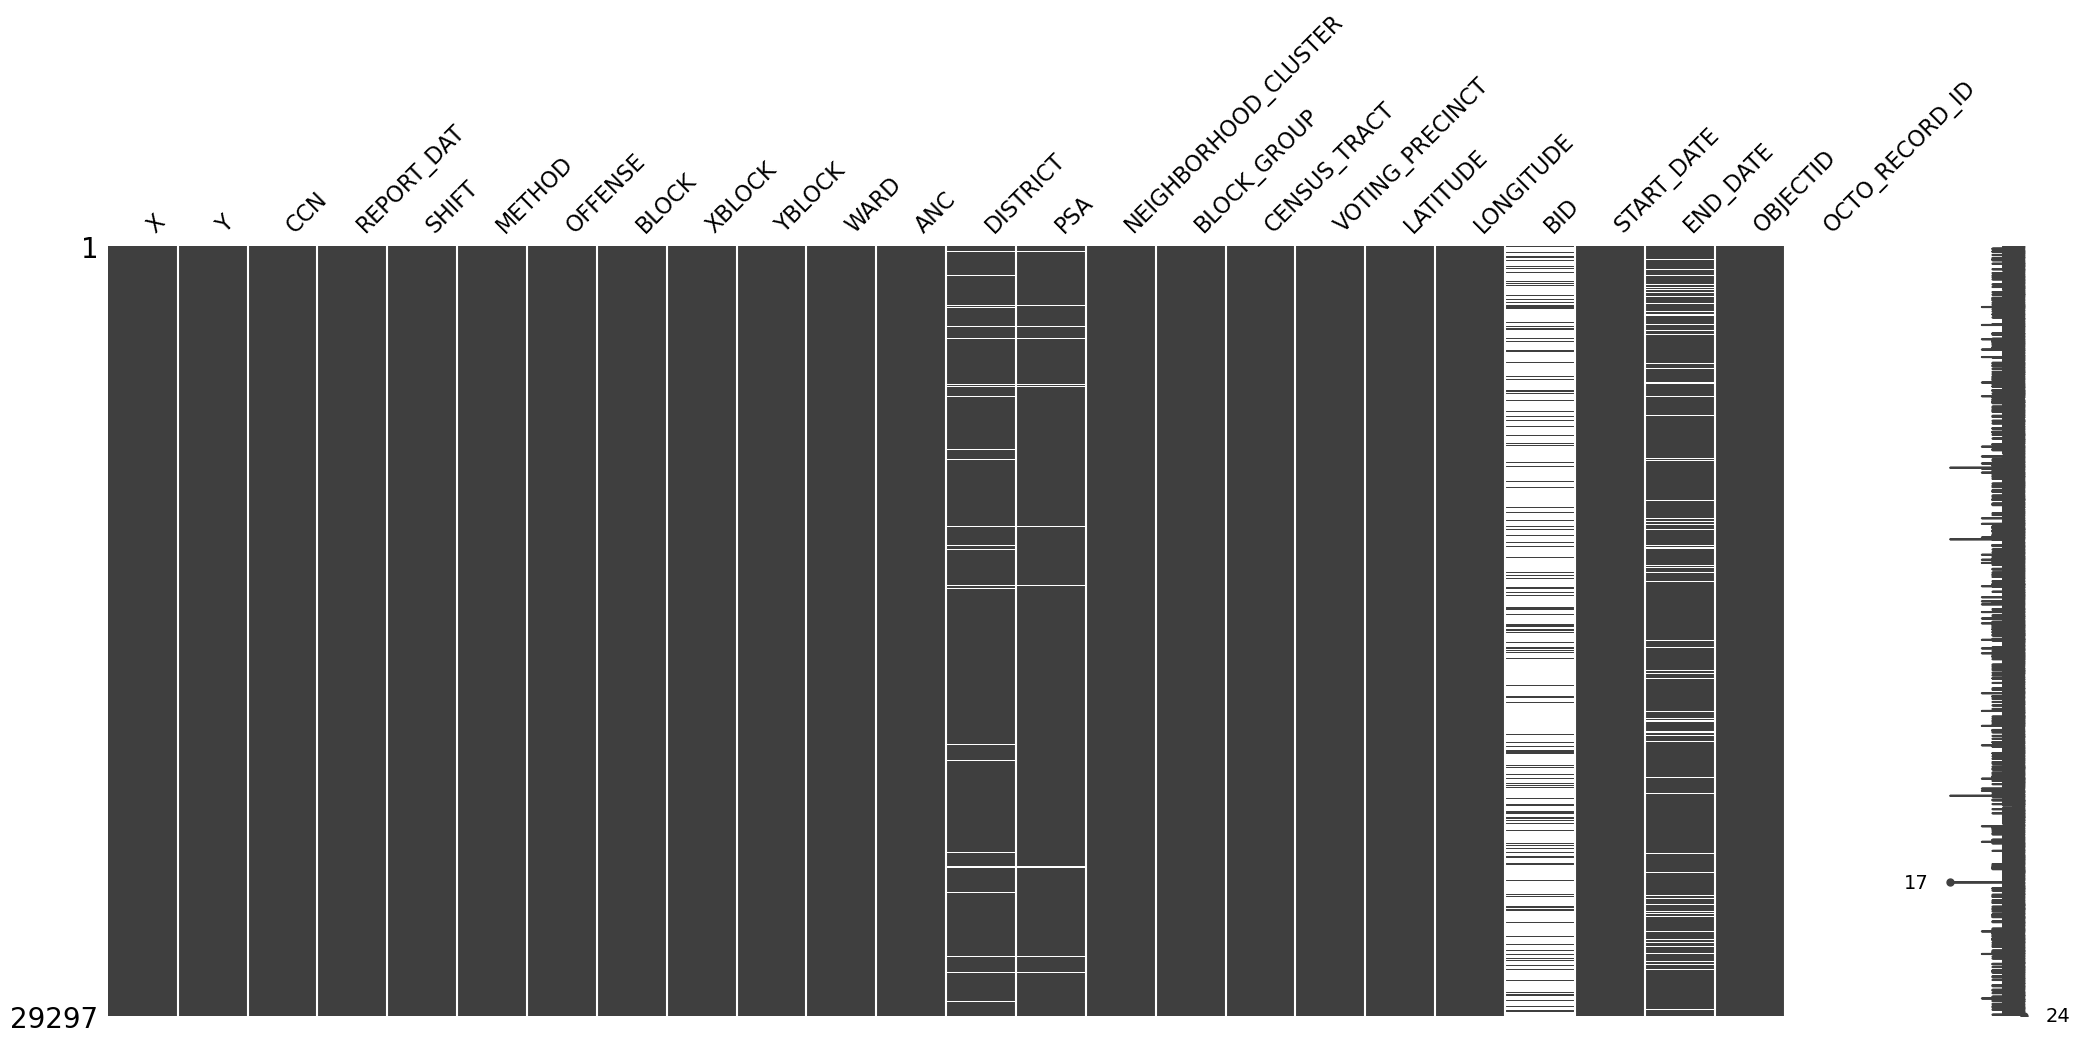

In [11]:
msno.matrix(data) 

<Axes: >

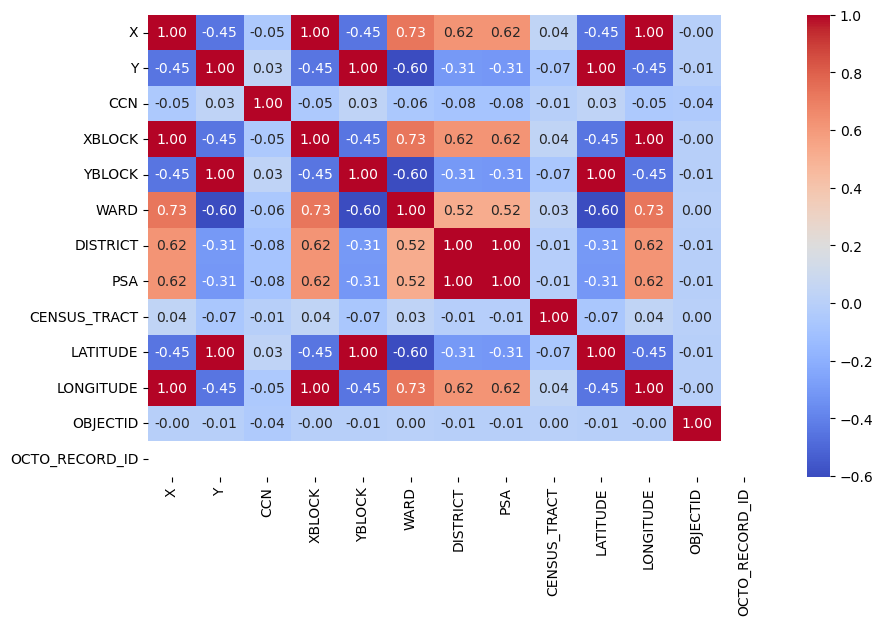

In [12]:
fig = plt.figure(figsize=(10, 6))
data_corr = data.corr(numeric_only=True) 
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')

In [13]:
data['X']

0        399581.5100
1        397318.1600
2        397833.8700
3        397576.9900
4        398010.3100
            ...     
29292    405967.0700
29293    400777.1000
29294    397085.4700
29295    402325.5791
29296    398455.3400
Name: X, Length: 29297, dtype: float64

In [14]:
data['LATITUDE']


0        38.835154
1        38.923765
2        38.914830
3        38.955682
4        38.916141
           ...    
29292    38.901479
29293    38.933032
29294    38.946126
29295    38.853554
29296    38.977785
Name: LATITUDE, Length: 29297, dtype: float64